# EDA

# Import data and data descrption

In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
df = pd.read_csv(r'C:\Users\asus\Downloads\Datasets-main\data_clean.csv',index_col=0)

In [64]:
df.head()

Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
1   41.0    190.0   7.4     67     5    1  2010    67       S
2   36.0    118.0   8.0     72     5    2  2010    72       C
3   12.0    149.0  12.6     74     5    3  2010    74      PS
4   18.0    313.0  11.5     62     5    4  2010    62       S
5    NaN      NaN  14.3     56     5    5  2010    56       S

In [65]:
df.describe()

Ozone     Solar.R        Wind         Day    Year        Temp
count  120.000000  151.000000  158.000000  158.000000   158.0  158.000000
mean    41.583333  185.403974    9.957595   16.006329  2010.0   77.727848
std     32.620709   88.723103    3.511261    8.997166     0.0    9.377877
min      1.000000    7.000000    1.700000    1.000000  2010.0   56.000000
25%     18.000000  119.000000    7.400000    8.000000  2010.0   72.000000
50%     30.500000  197.000000    9.700000   16.000000  2010.0   78.500000
75%     61.500000  257.000000   11.875000   24.000000  2010.0   84.000000
max    168.000000  334.000000   20.700000   31.000000  2010.0   97.000000

In [66]:
df.describe(include=object)

Temp C Month Weather
count     158   158     155
unique     41     6       3
top        81     9       S
freq       11    34      59

In [67]:
df.head(2)

Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
1   41.0    190.0   7.4     67     5    1  2010    67       S
2   36.0    118.0   8.0     72     5    2  2010    72       C

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


# data type conversion

In [69]:
df['Temp C'].unique()

array(['67', '72', '74', '62', '56', '66', '65', '59', '61', '69', 'C',
       '68', '58', '64', '57', '73', '81', '79', '76', '78', '84', '85',
       '82', '87', '90', '93', '92', '80', '77', '75', '83', '88', '89',
       '91', '86', '97', '94', '96', '71', '63', '70'], dtype=object)

In [70]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [71]:
#replace method


In [72]:
df['Temp C'].replace('C',np.nan,inplace=True)

In [73]:
df['Temp C'].unique()

array(['67', '72', '74', '62', '56', '66', '65', '59', '61', '69', nan,
       '68', '58', '64', '57', '73', '81', '79', '76', '78', '84', '85',
       '82', '87', '90', '93', '92', '80', '77', '75', '83', '88', '89',
       '91', '86', '97', '94', '96', '71', '63', '70'], dtype=object)

In [74]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [75]:
df['Month'].replace('May','5',inplace=True)

In [76]:
df['Month']=df['Month'].astype(int)

In [77]:
df['Month'].dtype

dtype('int32')

In [78]:
df['Temp C']=pd.to_numeric(df['Temp C'],errors='coerce')

In [79]:
df['Temp C'].unique()

array([67., 72., 74., 62., 56., 66., 65., 59., 61., 69., nan, 68., 58.,
       64., 57., 73., 81., 79., 76., 78., 84., 85., 82., 87., 90., 93.,
       92., 80., 77., 75., 83., 88., 89., 91., 86., 97., 94., 96., 71.,
       63., 70.])

# Duplicates

In [80]:
# print the duplicated values.

df[df.duplicated()]

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
157   14.0    191.0  14.3    75.0      9   28  2010    75       S

In [81]:
#get all the duplicate values 
#2 approches

In [82]:
df[(df['Ozone']==14.0)&(df['Day']==28)]

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
151   14.0    191.0  14.3    75.0      9   28  2010    75       S
157   14.0    191.0  14.3    75.0      9   28  2010    75       S

In [83]:
df[df.duplicated(keep=False)]

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
151   14.0    191.0  14.3    75.0      9   28  2010    75       S
157   14.0    191.0  14.3    75.0      9   28  2010    75       S

In [84]:
df.drop_duplicates()

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
1     41.0    190.0   7.4    67.0      5    1  2010    67       S
2     36.0    118.0   8.0    72.0      5    2  2010    72       C
3     12.0    149.0  12.6    74.0      5    3  2010    74      PS
4     18.0    313.0  11.5    62.0      5    4  2010    62       S
5      NaN      NaN  14.3    56.0      5    5  2010    56       S
..     ...      ...   ...     ...    ...  ...   ...   ...     ...
153   20.0    223.0  11.5    68.0      9   30  2010    68       S
154   41.0    190.0   7.4    67.0      5    1  2010    67       C
155   30.0    193.0   6.9    70.0      9   26  2010    70      PS
156    NaN    145.0  13.2    77.0      9   27  2010    77       S
158   18.0    131.0   8.0    76.0      9   29  2010    76       C

[157 rows x 9 columns]

In [85]:
df.drop_duplicates(inplace=True)

In [86]:
df[df.duplicated()]

Empty DataFrame
Columns: [Ozone, Solar.R, Wind, Temp C, Month, Day, Year, Temp, Weather]
Index: []

# drop columns

In [87]:
df.head()

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
1   41.0    190.0   7.4    67.0      5    1  2010    67       S
2   36.0    118.0   8.0    72.0      5    2  2010    72       C
3   12.0    149.0  12.6    74.0      5    3  2010    74      PS
4   18.0    313.0  11.5    62.0      5    4  2010    62       S
5    NaN      NaN  14.3    56.0      5    5  2010    56       S

In [88]:
df.drop(columns=['Temp C'], inplace=True)

In [89]:
df.head()

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
1   41.0    190.0   7.4      5    1  2010    67       S
2   36.0    118.0   8.0      5    2  2010    72       C
3   12.0    149.0  12.6      5    3  2010    74      PS
4   18.0    313.0  11.5      5    4  2010    62       S
5    NaN      NaN  14.3      5    5  2010    56       S

# Rename the coloumns

In [90]:
df.head()

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
1   41.0    190.0   7.4      5    1  2010    67       S
2   36.0    118.0   8.0      5    2  2010    72       C
3   12.0    149.0  12.6      5    3  2010    74      PS
4   18.0    313.0  11.5      5    4  2010    62       S
5    NaN      NaN  14.3      5    5  2010    56       S

In [91]:
df.rename(columns={'Solar.R' : 'Solar'},inplace=True)

In [92]:
df.head()

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
1   41.0  190.0   7.4      5    1  2010    67       S
2   36.0  118.0   8.0      5    2  2010    72       C
3   12.0  149.0  12.6      5    3  2010    74      PS
4   18.0  313.0  11.5      5    4  2010    62       S
5    NaN    NaN  14.3      5    5  2010    56       S

# missing value imputation

In [93]:
#checking null values

In [94]:
df.isna().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [95]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

sns.set_style('darkgrid')

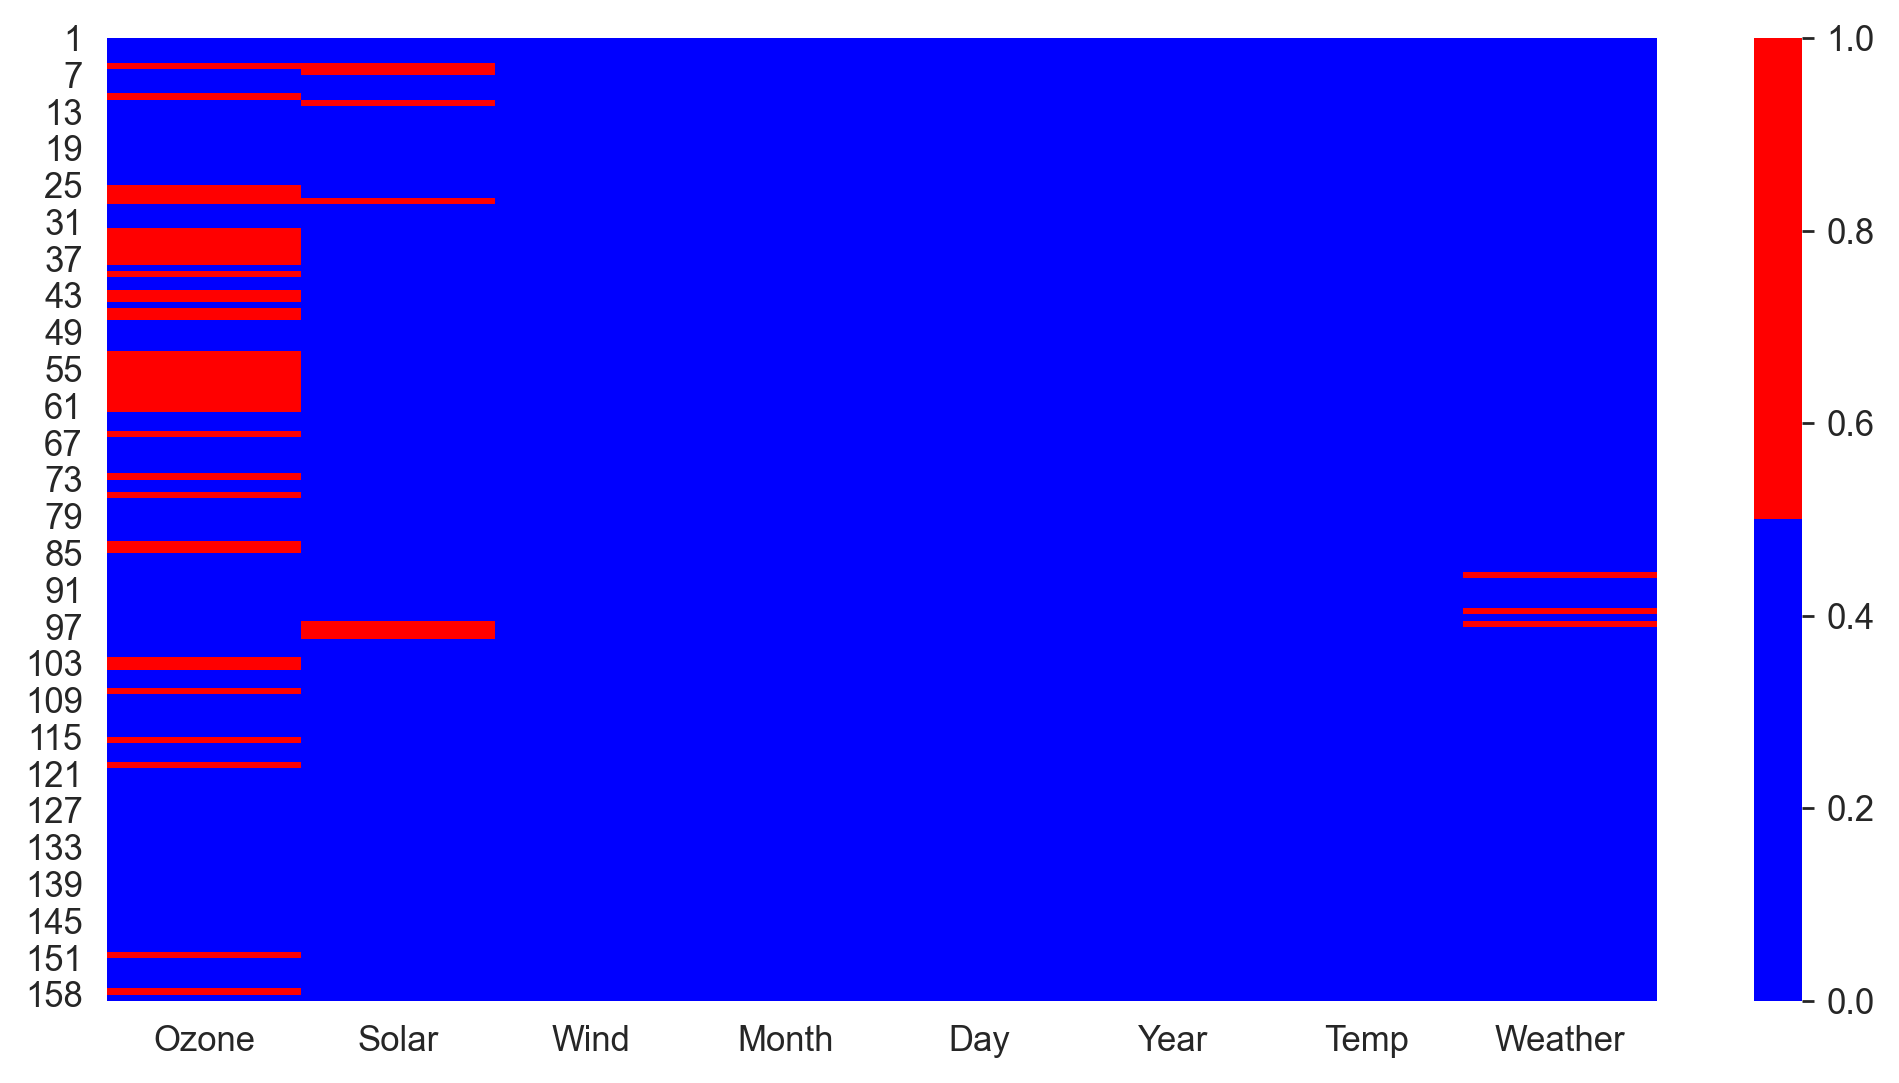

In [96]:
sns.heatmap(df.isna(), cmap=['blue','red'])
plt.show()

# Rules for missing value imputatation


In [97]:
#calculate the percentage of missing valuesin each column

In [98]:
null_val = df.isna().sum()/len(df)*100

In [99]:
null_val

Ozone      24.203822
Solar       4.458599
Wind        0.000000
Month       0.000000
Day         0.000000
Year        0.000000
Temp        0.000000
Weather     1.910828
dtype: float64

In [100]:
median = df['Ozone'].median()

df['Ozone'].fillna(median, inplace = True)

In [101]:
df.isna().sum()

Ozone      0
Solar      7
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [102]:
df['Solar'].fillna(df['Solar'].median(), inplace = True)


In [103]:
df['Weather'].mode()

0    S
Name: Weather, dtype: object

In [104]:
df['Weather'].fillna(df['Weather'].mode()[0], inplace = True)

In [105]:
df.isna().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

# outlier detection


In [106]:
df.describe()

Ozone       Solar        Wind       Month         Day    Year  \
count  157.000000  157.000000  157.000000  157.000000  157.000000   157.0   
mean    39.197452  185.974522    9.929936    7.019108   15.929936  2010.0   
std     28.781992   87.044783    3.505188    1.434338    8.974404     0.0   
min      1.000000    7.000000    1.700000    5.000000    1.000000  2010.0   
25%     21.000000  127.000000    7.400000    6.000000    8.000000  2010.0   
50%     31.000000  199.000000    9.700000    7.000000   16.000000  2010.0   
75%     45.000000  255.000000   11.500000    8.000000   24.000000  2010.0   
max    168.000000  334.000000   20.700000    9.000000   31.000000  2010.0   

             Temp  
count  157.000000  
mean    77.745223  
std      9.405334  
min     56.000000  
25%     72.000000  
50%     79.000000  
75%     84.000000  
max     97.000000

In [107]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

sns.set_style('darkgrid')

(array([28., 74., 21.,  9., 11.,  7.,  3.,  2.,  1.,  1.]),
 array([  1. ,  17.7,  34.4,  51.1,  67.8,  84.5, 101.2, 117.9, 134.6,
        151.3, 168. ]),
 <BarContainer object of 10 artists>)

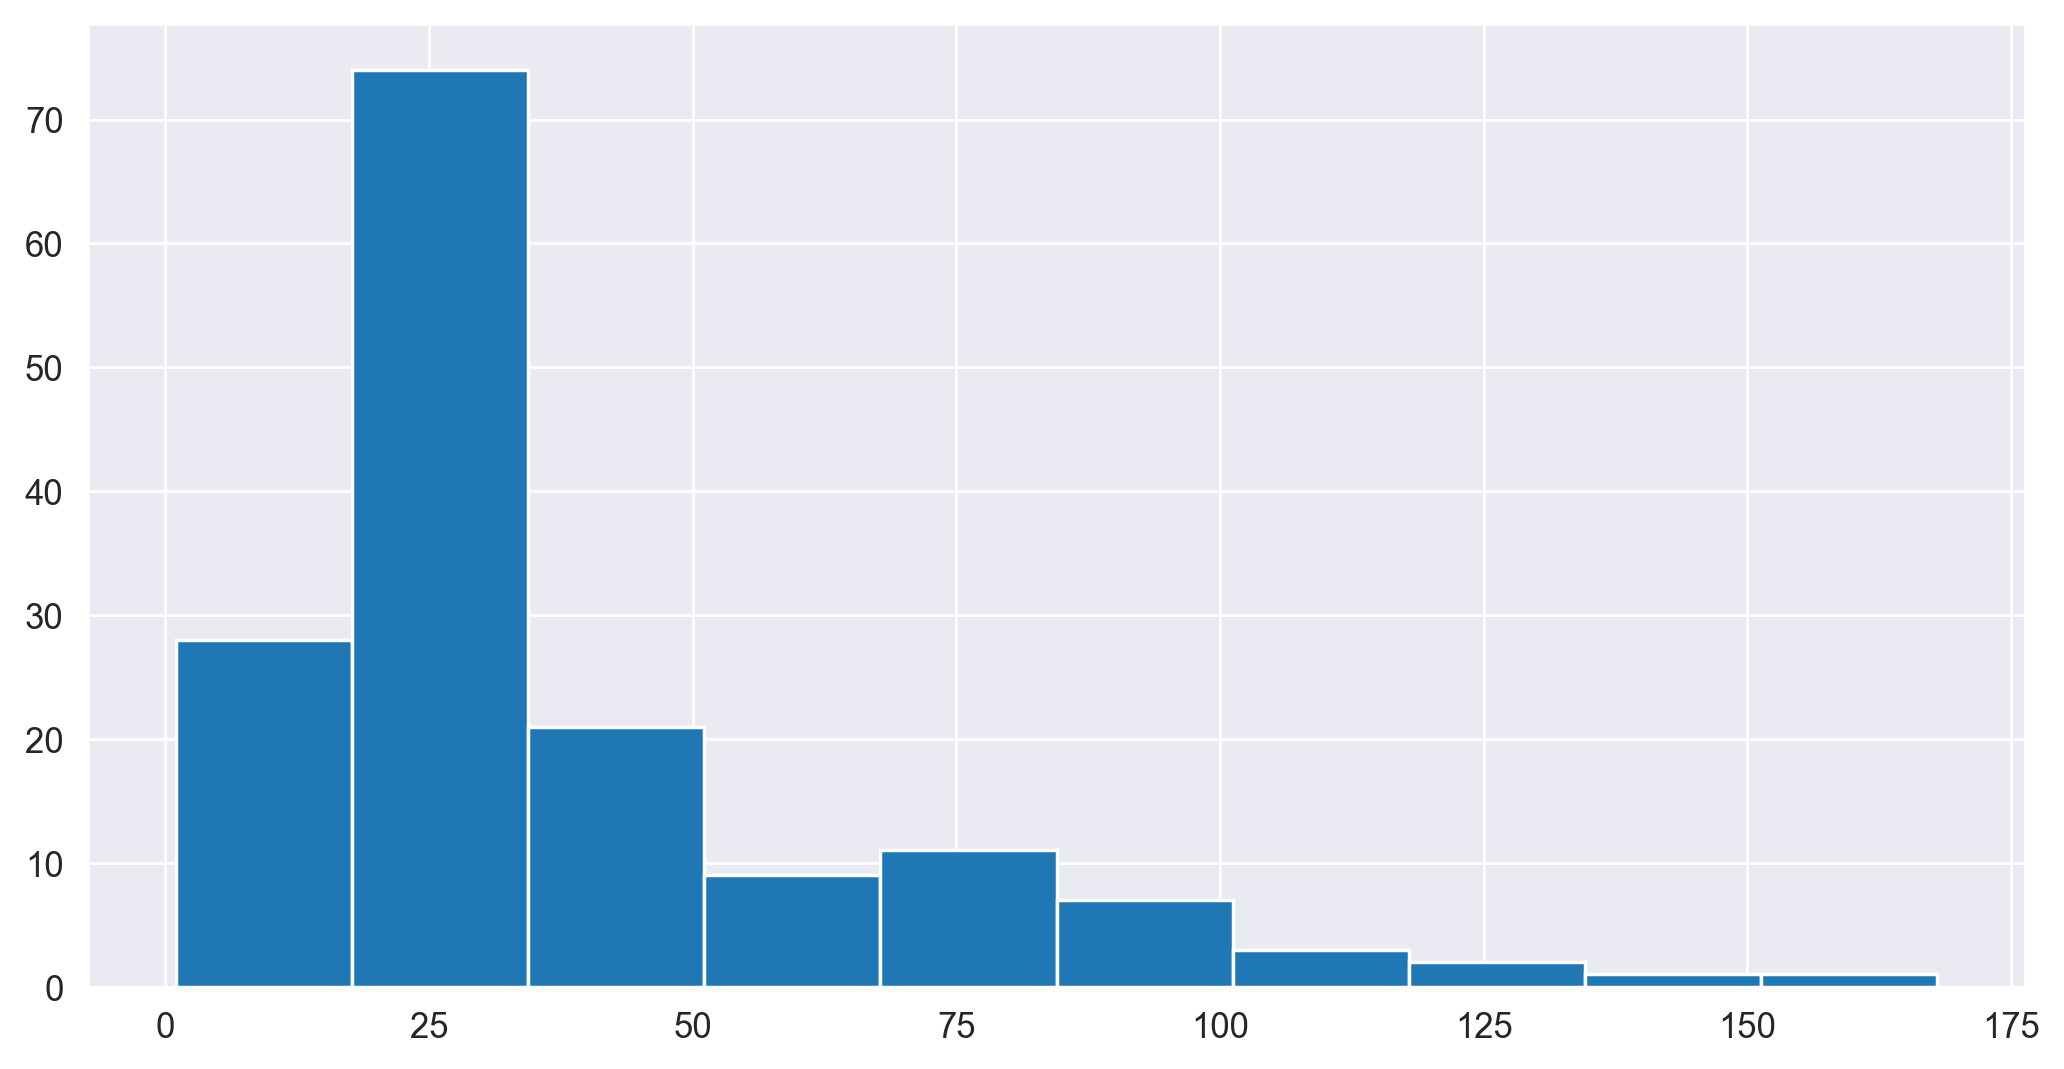

In [108]:
plt.hist(df['Ozone'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f0c4ddda90>,
 'caps': [<matplotlib.lines.Line2D at 0x1f0c4dec070>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1f0c4ddd6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f0c4dec610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f0c4decbb0>],
 'means': [<matplotlib.lines.Line2D at 0x1f0c4dec8e0>]}

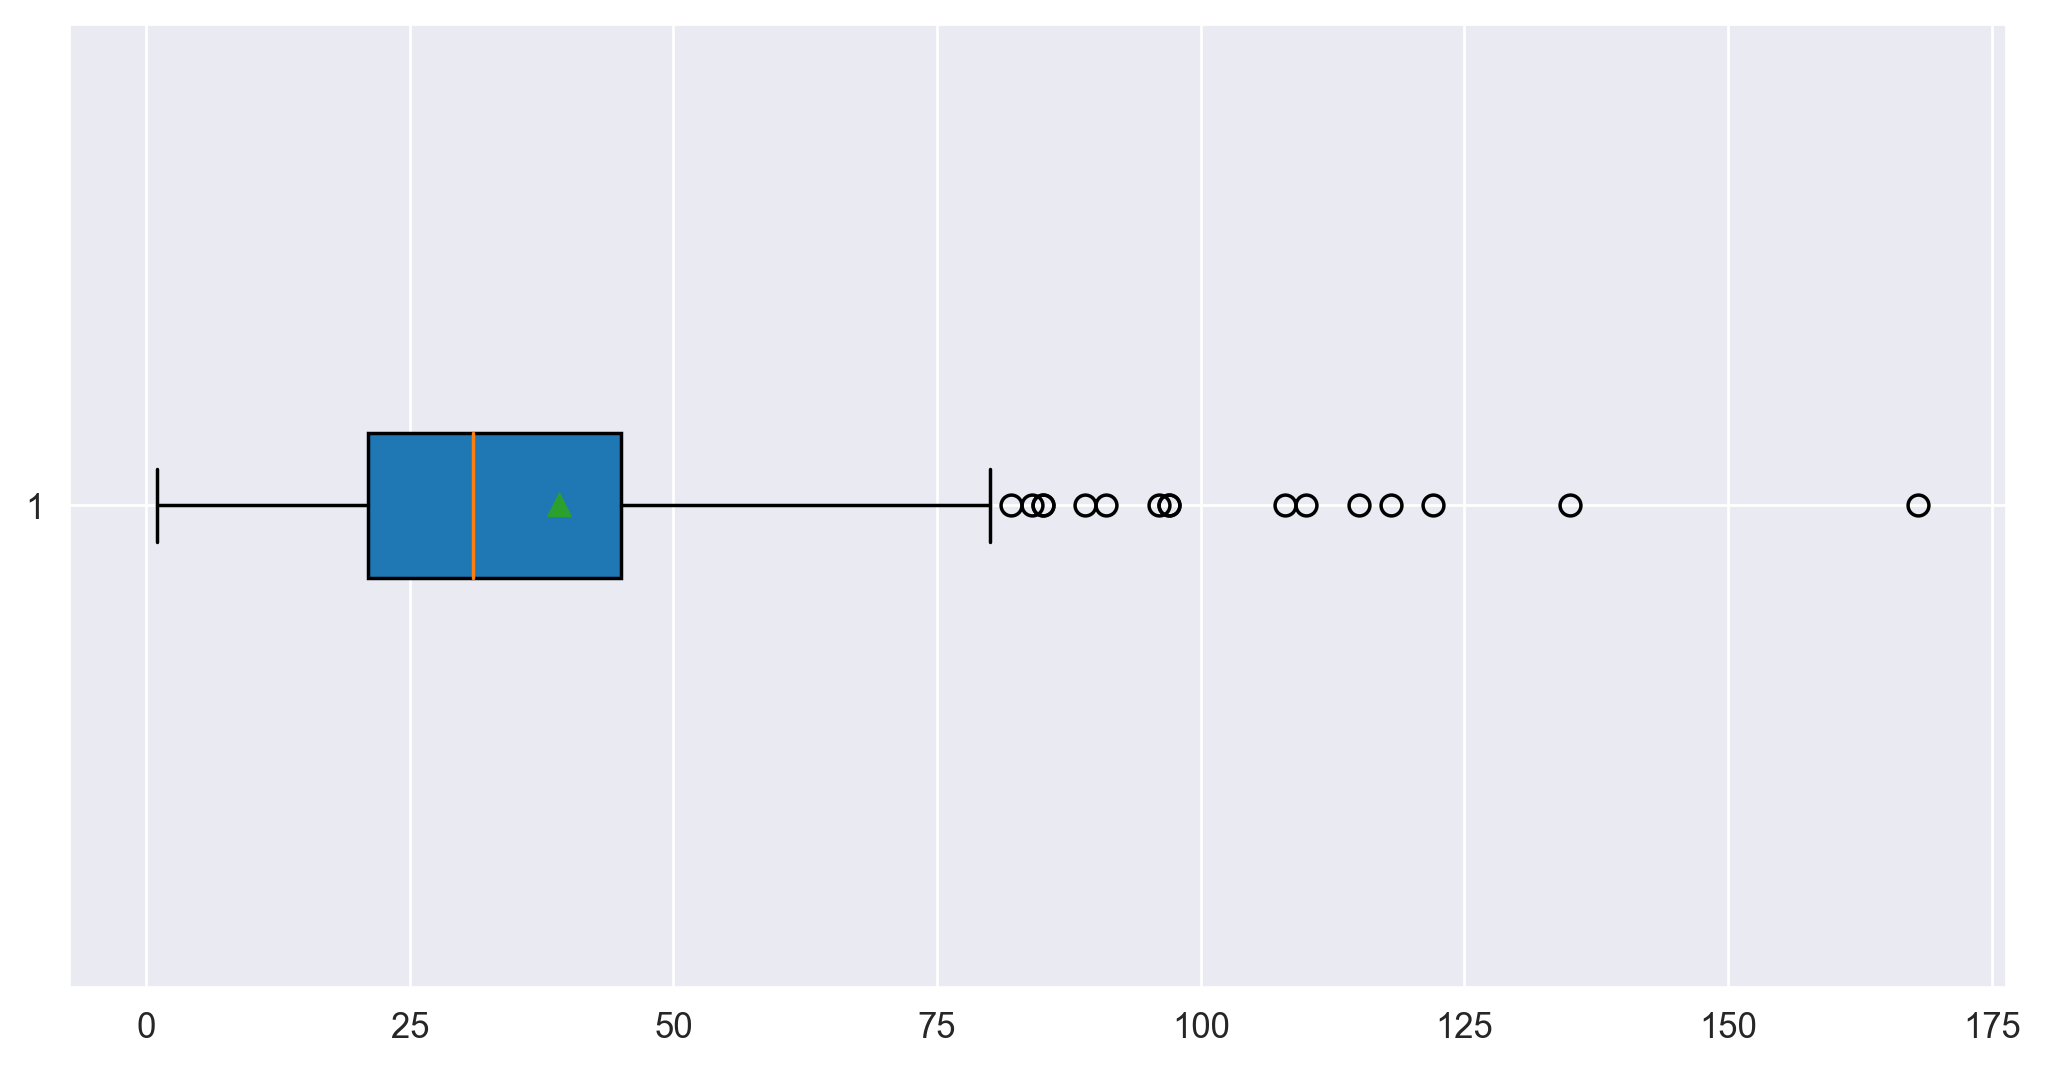

In [109]:
plt.boxplot(df['Ozone'],vert=False, patch_artist=True,showmeans=True)

In [110]:
df[df['Ozone']>77]

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
30   115.0  223.0   5.7      5   30  2010    79       C
62   135.0  269.0   4.1      7    1  2010    84       S
69    97.0  267.0   6.3      7    8  2010    92      PS
70    97.0  272.0   5.7      7    9  2010    92       C
71    85.0  175.0   7.4      7   10  2010    89      PS
80    79.0  187.0   5.1      7   19  2010    87      PS
85    80.0  294.0   8.6      7   24  2010    86      PS
86   108.0  223.0   8.0      7   25  2010    85      PS
89    82.0  213.0   7.4      7   28  2010    88       S
96    78.0  199.0   6.9      8    4  2010    86       S
99   122.0  255.0   4.0      8    7  2010    89       C
100   89.0  229.0  10.3      8    8  2010    90      PS
101  110.0  207.0   8.0      8    9  2010    90       C
117  168.0  238.0   3.4      8   25  2010    81      PS
121  118.0  225.0   2.3      8   29  2010    94       S
122   84.0  237.0   6.3      8   30  2010    96       S
123   85.0  188.0   6.3      8   31  2010    94       C
124   96.0  167.0   6.9      9    1  2010    91       C
125   78.0  197.0   5.1      9    2  2010    92      PS
127   91.0  189.0   4.6      9    4  2010    93      PS

{'whiskers': [<matplotlib.lines.Line2D at 0x1f0c4488190>,
 'caps': [<matplotlib.lines.Line2D at 0x1f0c4488430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f0c4488d30>,
 'medians': [<matplotlib.lines.Line2D at 0x1f0c447e040>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f0c447e460>,
 'means': []}

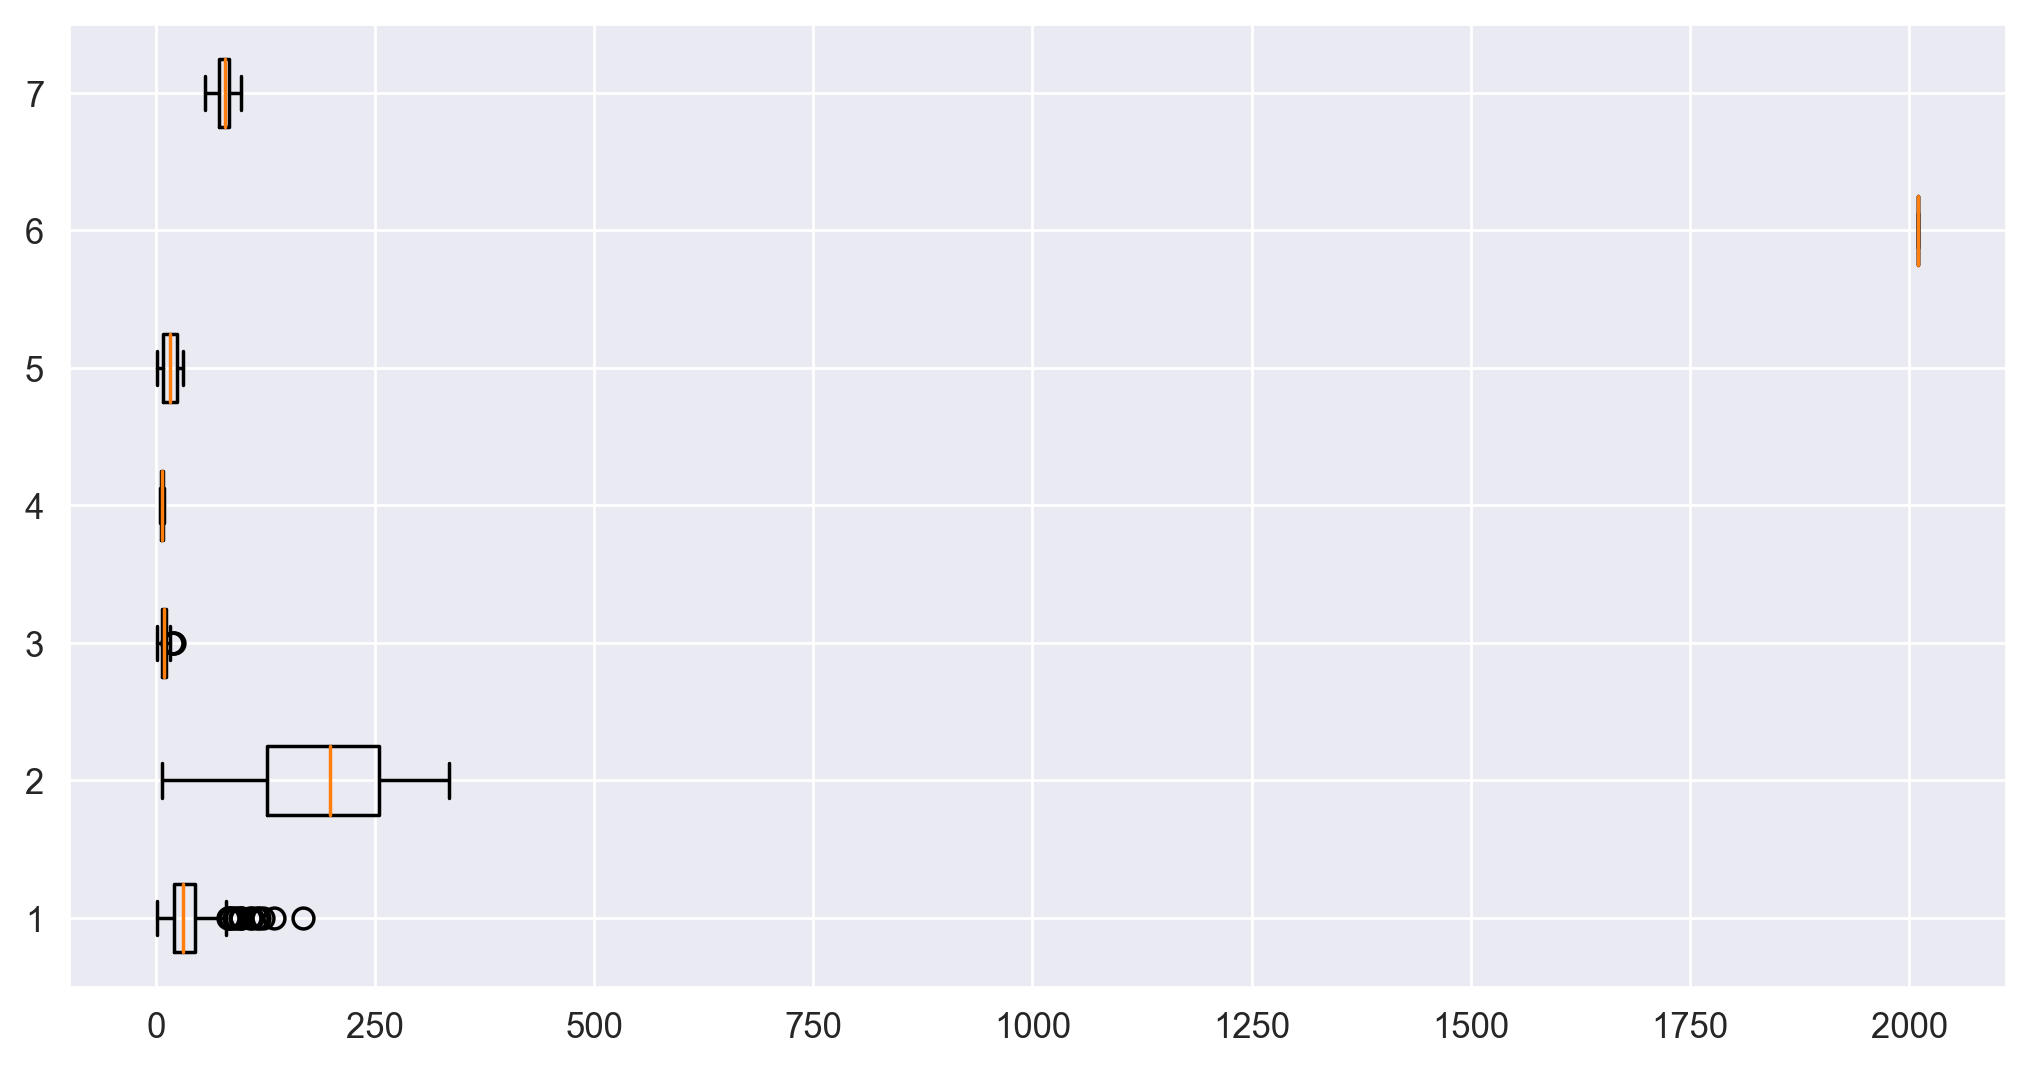

In [111]:
plt.boxplot(df.drop(columns=['Weather']),vert=False)

# Scatter plot and Correlation

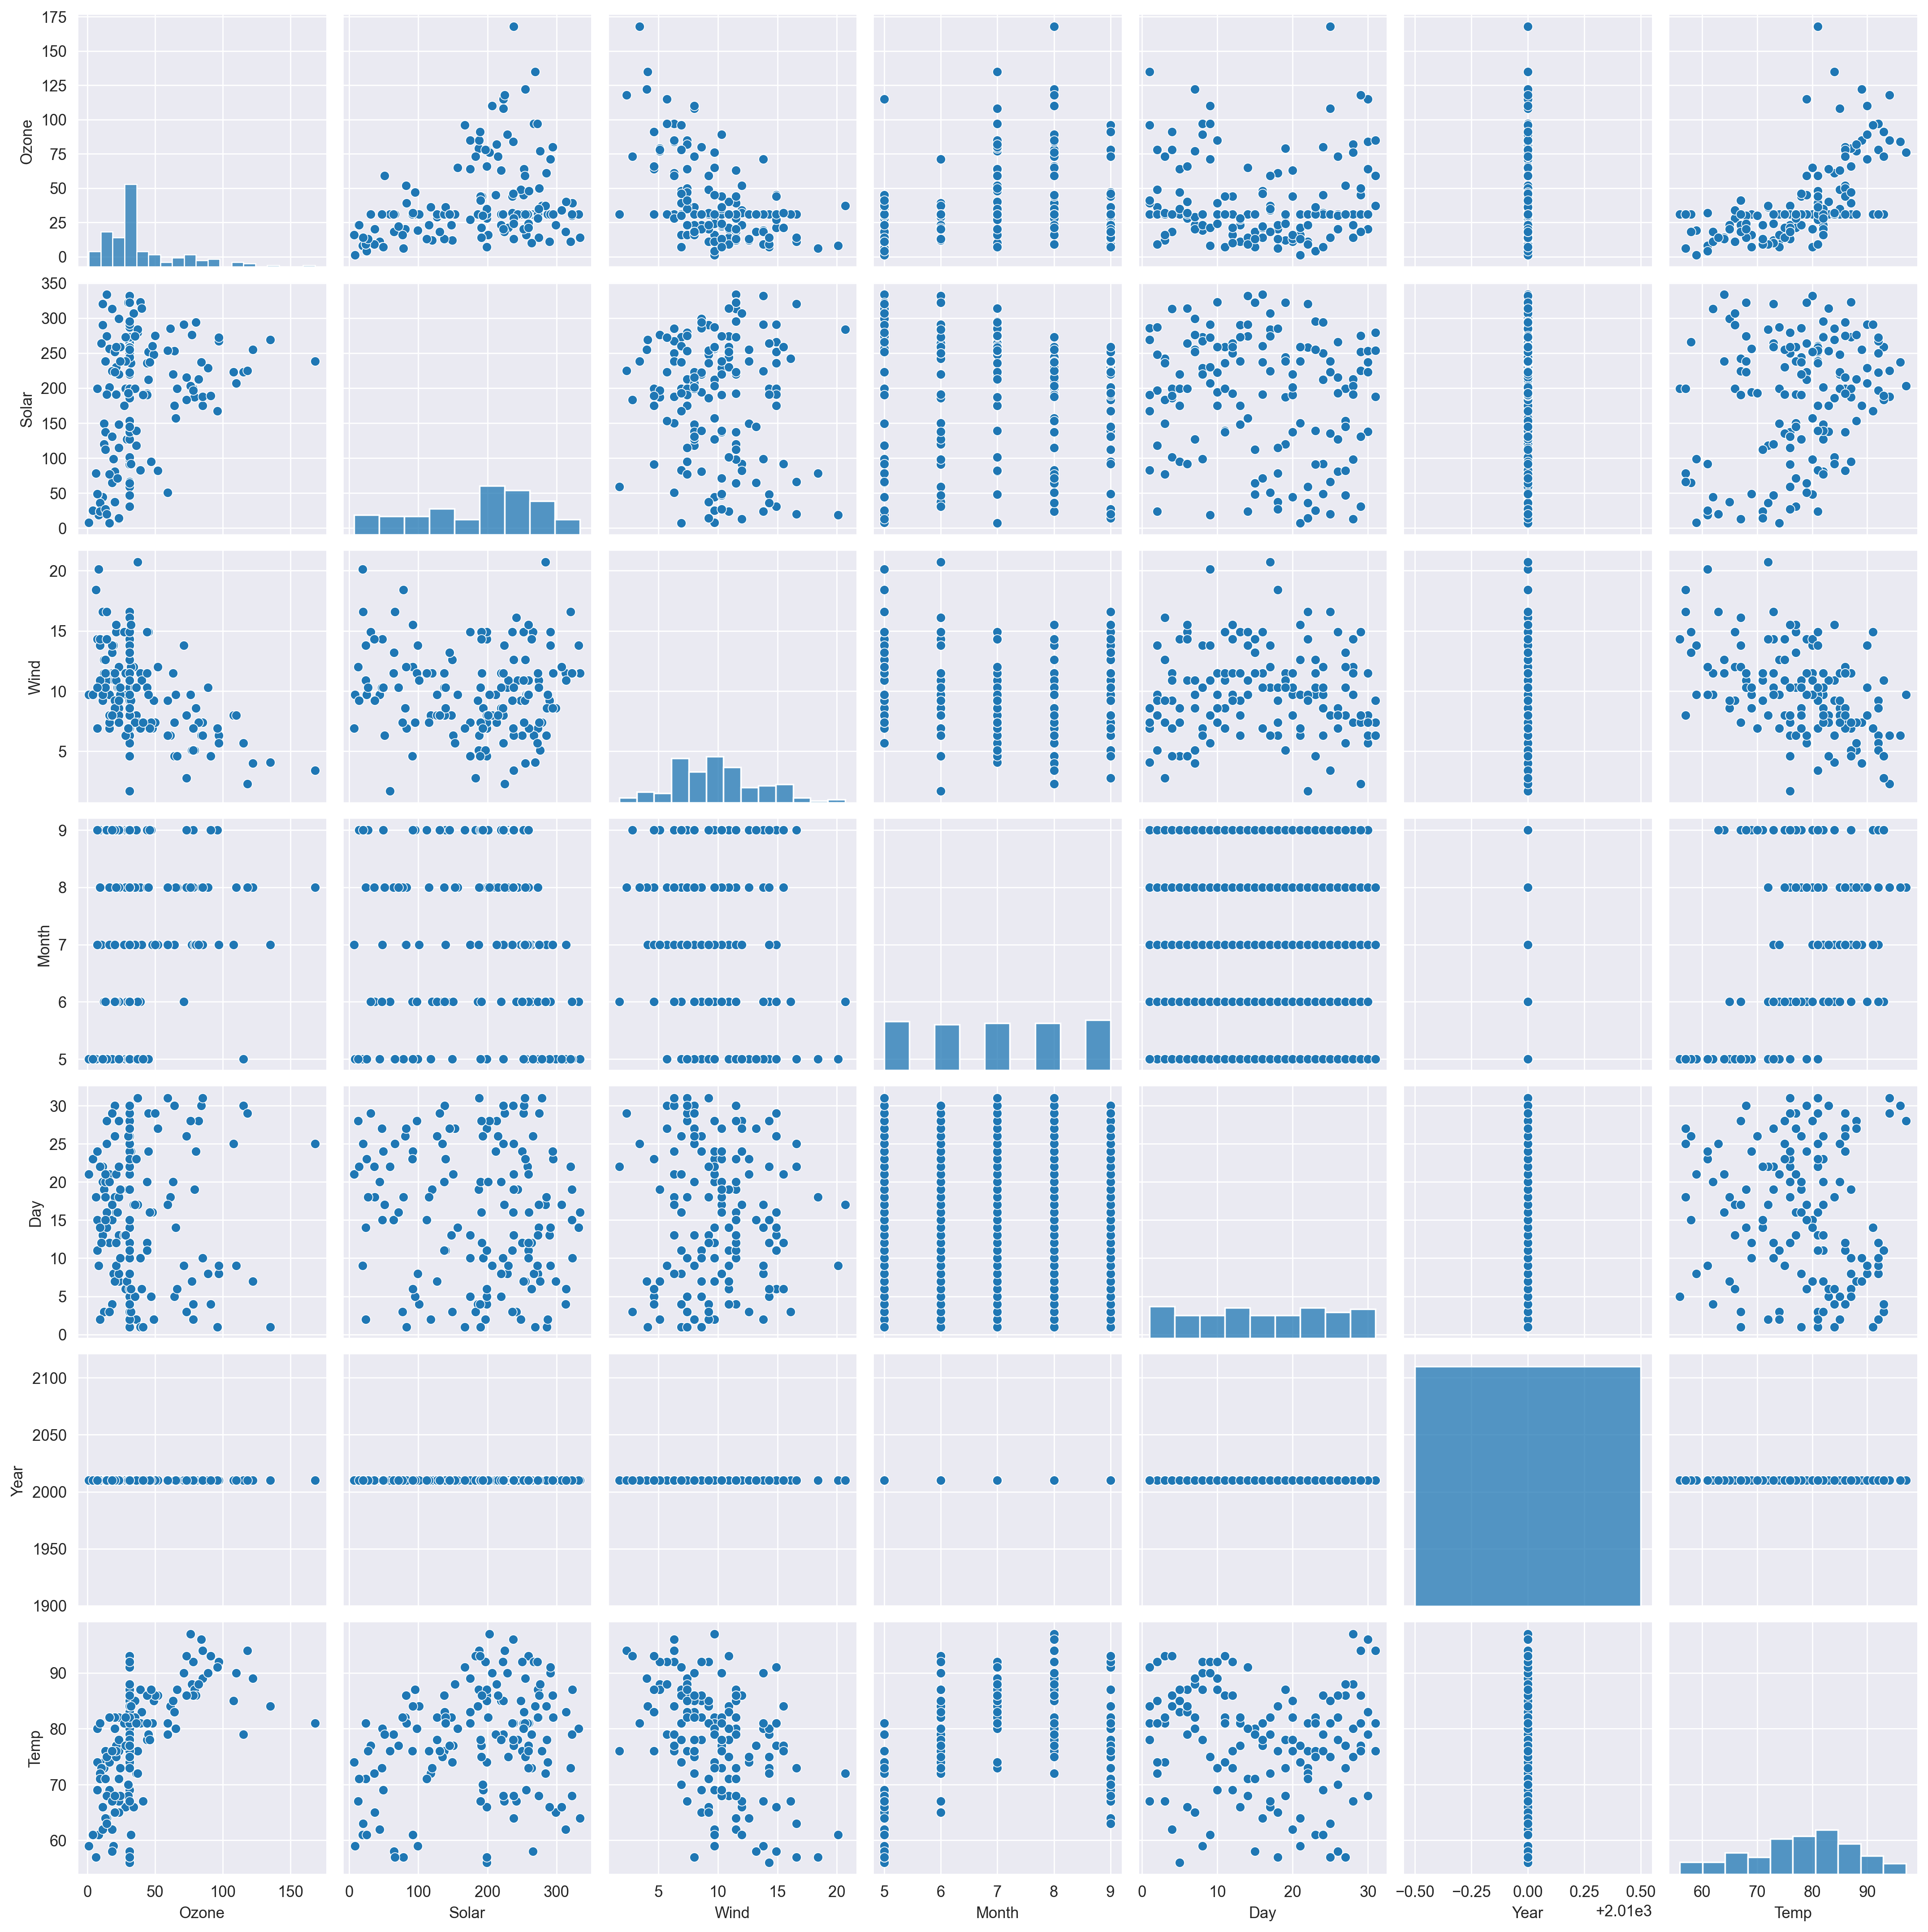

In [112]:
sns.pairplot(df)

C:\Users\asus\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 2010.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\asus\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 2010.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\asus\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 2010.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


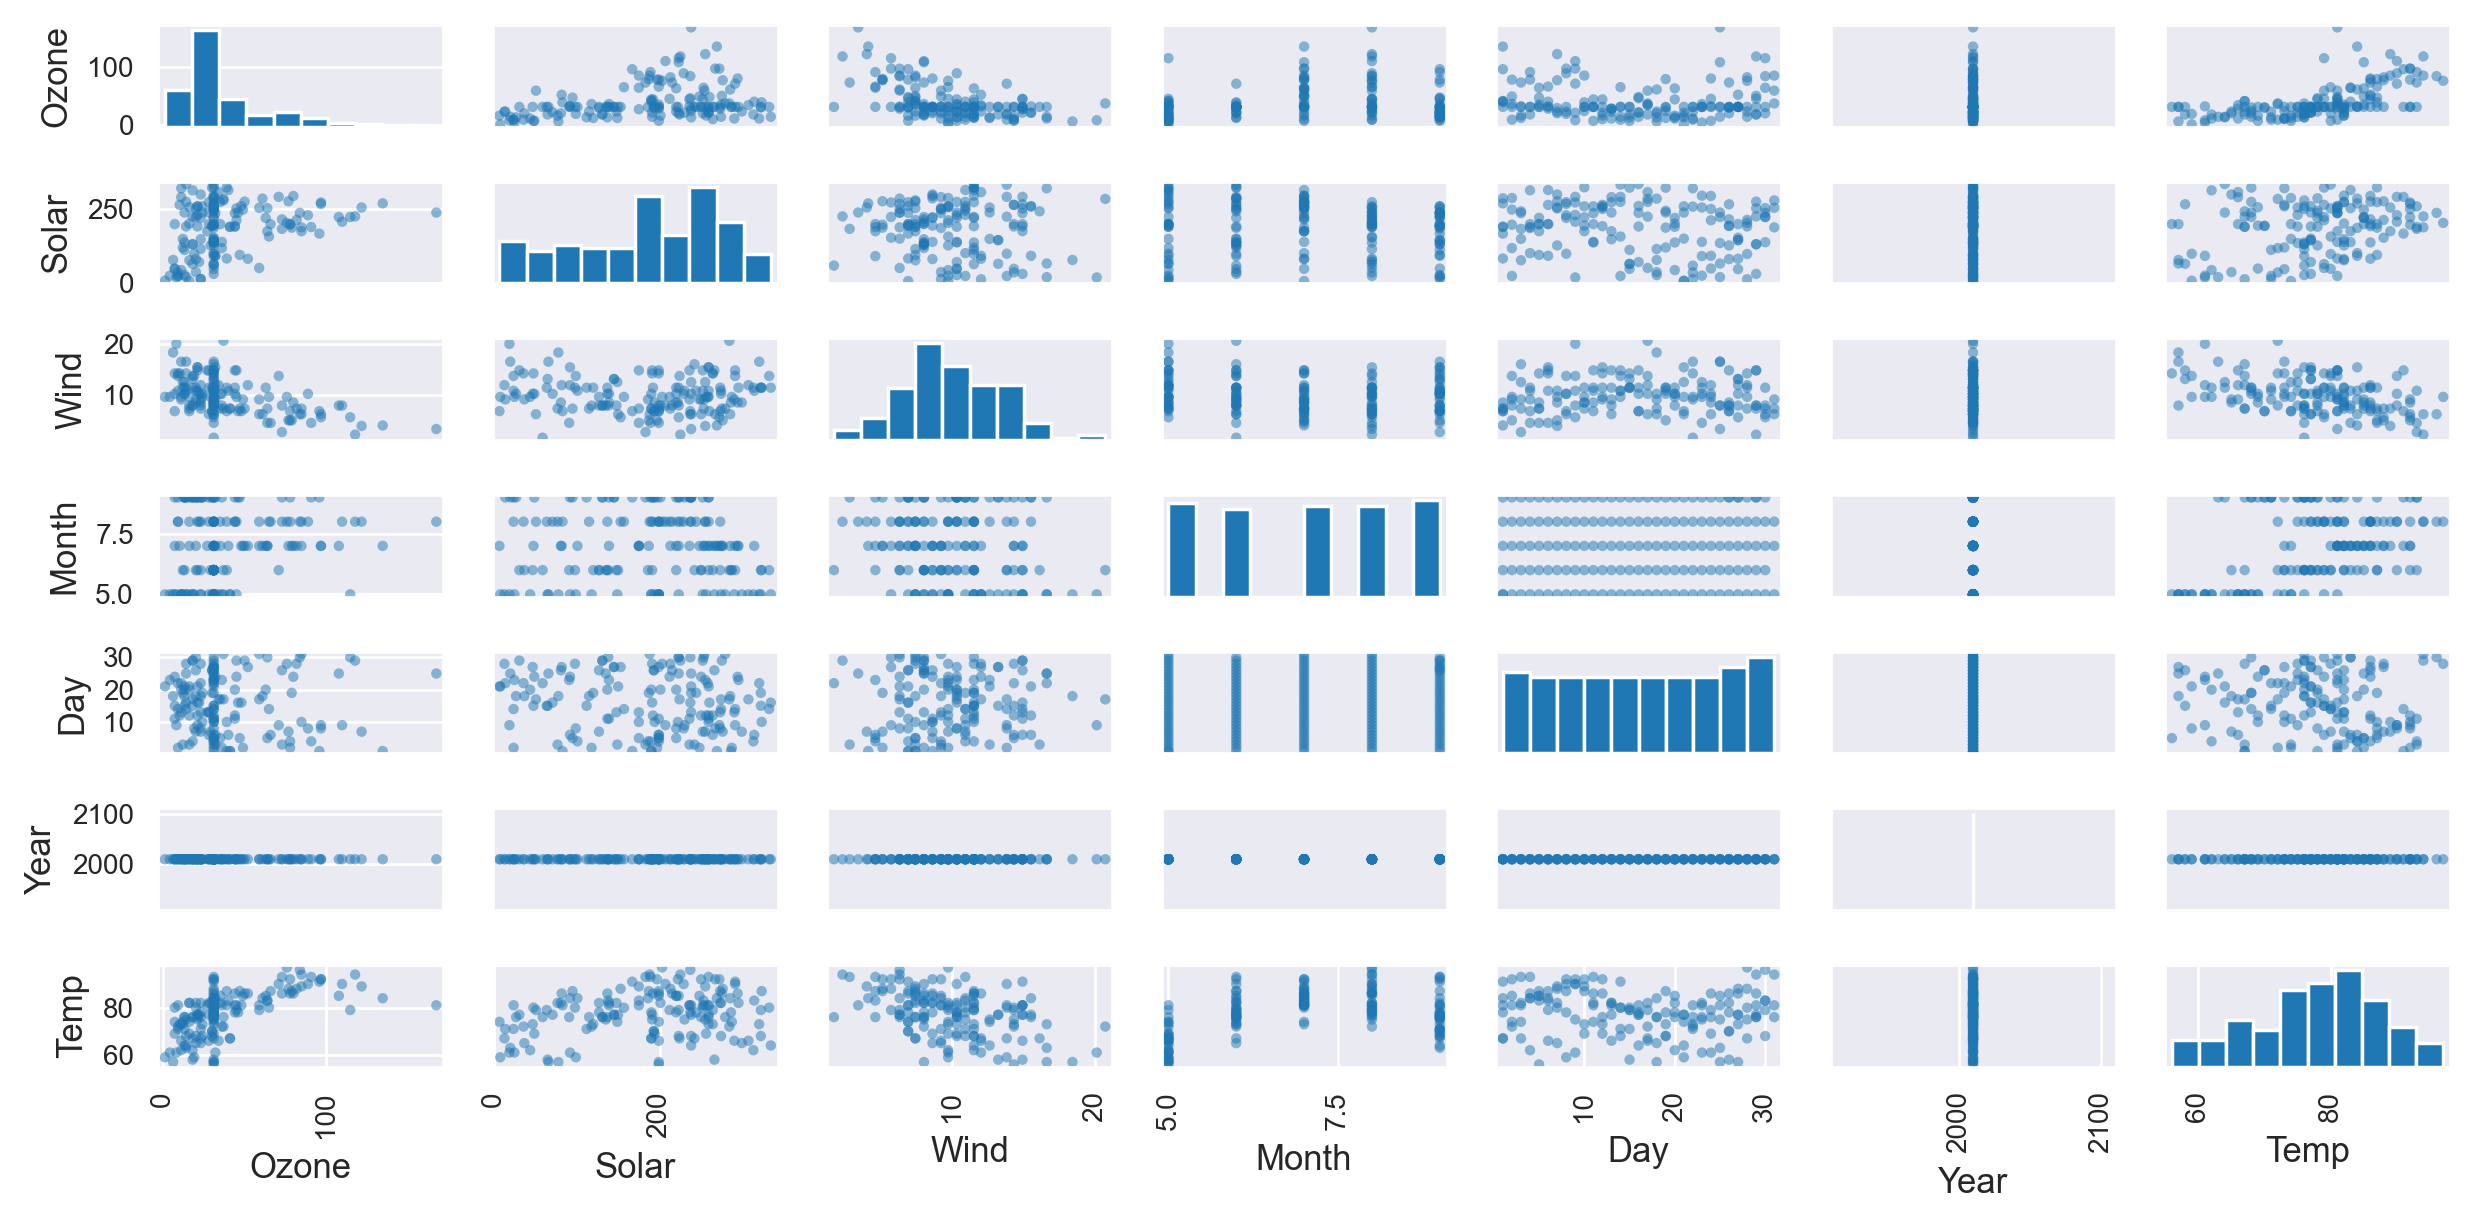

In [113]:
pd.plotting.scatter_matrix(df)
plt.tight_layout()

In [114]:
df.corr()

Ozone     Solar      Wind     Month       Day  Year      Temp
Ozone  1.000000  0.297561 -0.523738  0.171488 -0.031737   NaN  0.597087
Solar  0.297561  1.000000 -0.057709 -0.083788 -0.156243   NaN  0.256994
Wind  -0.523738 -0.057709  1.000000 -0.170328  0.029900   NaN -0.441228
Month  0.171488 -0.083788 -0.170328  1.000000  0.041438   NaN  0.408060
Day   -0.031737 -0.156243  0.029900  0.041438  1.000000   NaN -0.122787
Year        NaN       NaN       NaN       NaN       NaN   NaN       NaN
Temp   0.597087  0.256994 -0.441228  0.408060 -0.122787   NaN  1.000000

<AxesSubplot:>

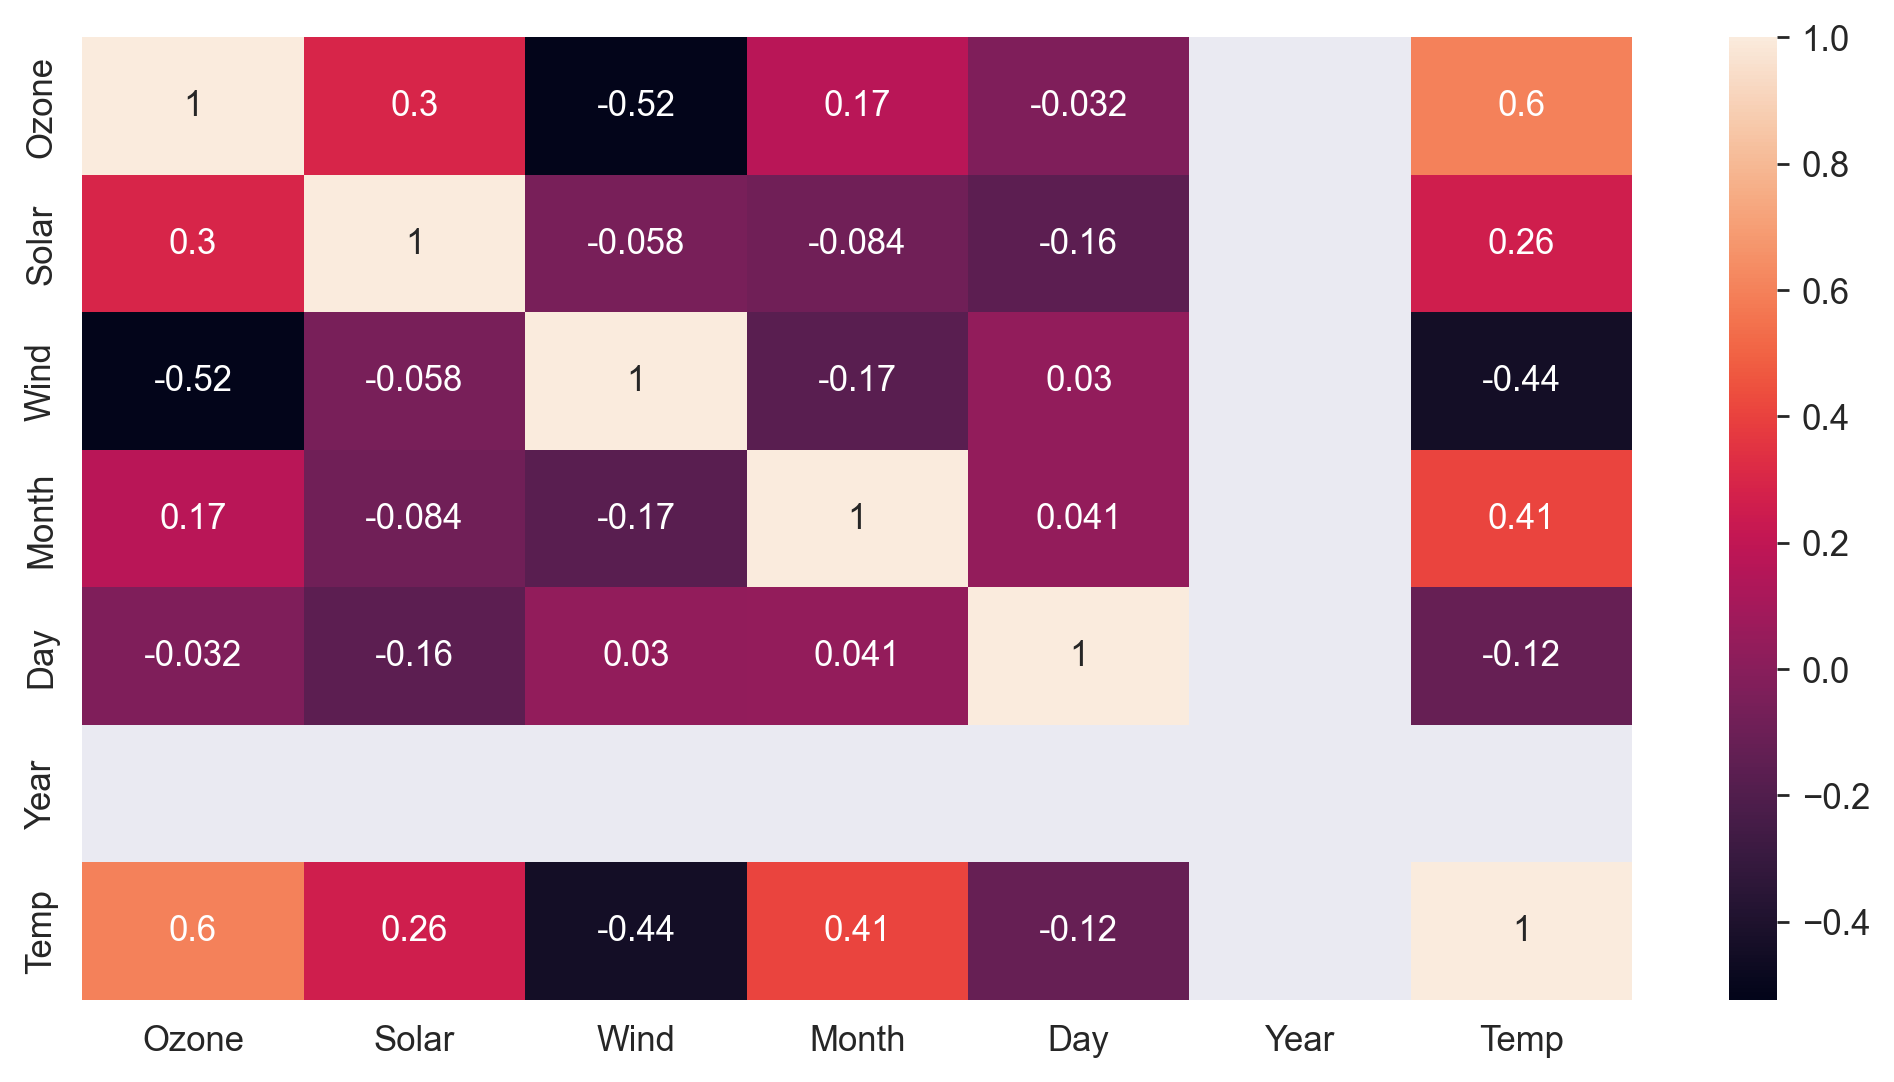

In [115]:
sns.heatmap(df.corr(),annot=True)

# Transfromations

In [116]:
#Encoding using pandas dummy function.

In [117]:
df.head()

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
1   41.0  190.0   7.4      5    1  2010    67       S
2   36.0  118.0   8.0      5    2  2010    72       C
3   12.0  149.0  12.6      5    3  2010    74      PS
4   18.0  313.0  11.5      5    4  2010    62       S
5   31.0  199.0  14.3      5    5  2010    56       S

In [118]:
df = pd.get_dummies(data=df,columns=['Weather'])

In [119]:
df

Ozone  Solar  Wind  Month  Day  Year  Temp  Weather_C  Weather_PS  \
1     41.0  190.0   7.4      5    1  2010    67          0           0   
2     36.0  118.0   8.0      5    2  2010    72          1           0   
3     12.0  149.0  12.6      5    3  2010    74          0           1   
4     18.0  313.0  11.5      5    4  2010    62          0           0   
5     31.0  199.0  14.3      5    5  2010    56          0           0   
..     ...    ...   ...    ...  ...   ...   ...        ...         ...   
153   20.0  223.0  11.5      9   30  2010    68          0           0   
154   41.0  190.0   7.4      5    1  2010    67          1           0   
155   30.0  193.0   6.9      9   26  2010    70          0           1   
156   31.0  145.0  13.2      9   27  2010    77          0           0   
158   18.0  131.0   8.0      9   29  2010    76          1           0   

     Weather_S  
1            1  
2            0  
3            0  
4            1  
5            1  
..         ...  
153          1  
154          0  
155          0  
156          1  
158          0  

[157 rows x 10 columns]

# Scalling the data

In [120]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [121]:
#normalization

mn = MinMaxScaler()

In [122]:
df1 = mn.fit_transform(df)
df1 = pd.DataFrame(df1,columns=df.columns)
df1

Ozone     Solar      Wind  Month       Day  Year      Temp  Weather_C  \
0    0.239521  0.559633  0.300000    0.0  0.000000   0.0  0.268293        0.0   
1    0.209581  0.339450  0.331579    0.0  0.033333   0.0  0.390244        1.0   
2    0.065868  0.434251  0.573684    0.0  0.066667   0.0  0.439024        0.0   
3    0.101796  0.935780  0.515789    0.0  0.100000   0.0  0.146341        0.0   
4    0.179641  0.587156  0.663158    0.0  0.133333   0.0  0.000000        0.0   
..        ...       ...       ...    ...       ...   ...       ...        ...   
152  0.113772  0.660550  0.515789    1.0  0.966667   0.0  0.292683        0.0   
153  0.239521  0.559633  0.300000    0.0  0.000000   0.0  0.268293        1.0   
154  0.173653  0.568807  0.273684    1.0  0.833333   0.0  0.341463        0.0   
155  0.179641  0.422018  0.605263    1.0  0.866667   0.0  0.512195        0.0   
156  0.101796  0.379205  0.331579    1.0  0.933333   0.0  0.487805        1.0   

     Weather_PS  Weather_S  
0           0.0        1.0  
1           0.0        0.0  
2           1.0        0.0  
3           0.0        1.0  
4           0.0        1.0  
..          ...        ...  
152         0.0        1.0  
153         0.0        0.0  
154         1.0        0.0  
155         0.0        1.0  
156         0.0        0.0  

[157 rows x 10 columns]

In [123]:
df1['Ozone'].max()

1.0000000000000002

In [124]:
#standardization

In [125]:
sc = StandardScaler()

In [127]:
df2 = pd.DataFrame(sc.fit_transform(df),columns=df.columns)
df2

Ozone     Solar      Wind     Month       Day  Year      Temp  \
0    0.062828  0.046394 -0.724079 -1.412198 -1.668937   0.0 -1.146116   
1   -0.111448 -0.783413 -0.552356 -1.412198 -1.557152   0.0 -0.612802   
2   -0.947971 -0.426135  0.764184 -1.412198 -1.445367   0.0 -0.399476   
3   -0.738840  1.463982  0.449359 -1.412198 -1.333583   0.0 -1.679431   
4   -0.285723  0.150120  1.250731 -1.412198 -1.221798   0.0 -2.319408   
..        ...       ...       ...       ...       ...   ...       ...   
152 -0.669130  0.426722  0.449359  1.385469  1.572816   0.0 -1.039454   
153  0.062828  0.046394 -0.724079 -1.412198 -1.668937   0.0 -1.146116   
154 -0.320578  0.080969 -0.867181  1.385469  1.125678   0.0 -0.826128   
155 -0.285723 -0.472236  0.935906  1.385469  1.237462   0.0 -0.079488   
156 -0.738840 -0.633587 -0.552356  1.385469  1.461032   0.0 -0.186150   

     Weather_C  Weather_PS  Weather_S  
0    -0.673575   -0.653661    1.25450  
1     1.484615   -0.653661   -0.79713  
2    -0.673575    1.529845   -0.79713  
3    -0.673575   -0.653661    1.25450  
4    -0.673575   -0.653661    1.25450  
..         ...         ...        ...  
152  -0.673575   -0.653661    1.25450  
153   1.484615   -0.653661   -0.79713  
154  -0.673575    1.529845   -0.79713  
155  -0.673575   -0.653661    1.25450  
156   1.484615   -0.653661   -0.79713  

[157 rows x 10 columns]

In [128]:
df2['Ozone'].mean()

-1.4142968466562504e-17

In [129]:
df2['Ozone'].std()

1.0032000081789556

# speed up the EDA process

In [140]:
!pip install pandas-profiling==3.1.0
!pip install sweetviz

     -------------------------------------- 261.2/261.2 kB 1.6 MB/s eta 0:00:00
     ------------------------------------ 102.4/102.4 kB 980.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 663.5/663.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 3.1/3.1 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 303.1/303.1 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 3.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=651e89e94621e9198618eaa20138ef8ef38ee88494e658dc2c64da3026f8cd6a
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
  Attempting uninstall: joblib
   

In [149]:
import pandas_profiling as pp
import sweetviz as sv

In [153]:
df.head()

Ozone  Solar  Wind  Month  Day  Year  Temp  Weather_C  Weather_PS  \
1   41.0  190.0   7.4      5    1  2010    67          0           0   
2   36.0  118.0   8.0      5    2  2010    72          1           0   
3   12.0  149.0  12.6      5    3  2010    74          0           1   
4   18.0  313.0  11.5      5    4  2010    62          0           0   
5   31.0  199.0  14.3      5    5  2010    56          0           0   

   Weather_S  
1          1  
2          0  
3          0  
4          1  
5          1

In [155]:
EDA_report=pp.ProfileReport(df,title="pandas Profiling Report",vars={"num":{"low_categorical_threshold":0}})
EDA_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [156]:
EDA_report.to_file(output_file='EDA.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [157]:
sweet_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [158]:
sweet_report

In [159]:
sweet_report.show_html('weather_report.html')

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
